In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
%matplotlib inline
warnings.filterwarnings(action='ignore')

In [2]:
## to view all the columns in the
pd.set_option("display.max_columns", None)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/fifa.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
## loading the variable information csv file.
data_info = pd.read_csv('/content/drive/MyDrive/Datasets/fifa_ variable_information.csv')
data_info.head()

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag


### Q2. Drop the columns which you think redundant for the analysis


In [5]:
df[['Photo','Flag','Club Logo','Body Type','Jersey Number']].head(2)

,Photo,Flag,Club Logo,Body Type,Jersey Number
0,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/flags/52.png,https://cdn.sofifa.org/teams/2/light/241.png,Messi,10.0
1,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/flags/38.png,https://cdn.sofifa.org/teams/2/light/45.png,C. Ronaldo,7.0


In [6]:
## dropping the above five categorical columns, which are redundant for our analysis.
df.drop(['Photo','Flag','Club Logo','Body Type','Jersey Number'],axis=1,inplace=True)

In [7]:
df.shape

(18207, 55)

## Data Preprocessing

### Q3. Convert the column "Value", "Wage", "Release Clause" to float datatype after getting rid of currency symbol and suffix.

- **Note:** When the record/entry has "M"(indicates millions) as suffix you need to multiply that value with 1000000
- When the record/entry has "K"(indicates thousands) as suffix you need to multiply that value with 1000

In [ ]:
## Just checking some samples.
df[['Value','Wage','Release Clause']].sample(4)

In [ ]:
## Writing a function to clean the data of columns "Value" and "Wage"
def convert(entry):

    if entry==np.nan:
        new_entry=float(0)
    else:
        entry=entry.replace('€','')
        if entry[-1]=='K':
            new_entry=float(entry.replace('K',''))*1000
        else:
            new_entry=float(entry.replace('M',''))*1000000
    return new_entry

In [ ]:
## applying the above function to column 'Value'
df['Value']= df['Value'].apply(lambda x : convert(x))

## applying the above function to column 'Wage'
df['Wage'] = df['Wage'].apply(lambda x: convert(x))

## applying the above function to column 'Release Clause'
df['Release Clause'] = df['Release Clause'].fillna('0').apply(lambda x: convert(x))

In [ ]:
## Just checking some samples after cleaning the data.
df[['Value','Wage','Release Clause']].sample(4)

,Value,Wage,Release Clause
2991,€5M,€9K,€8M
286,€21M,€1K,€44.1M
4037,€2.3M,€35K,€4.3M
8775,€900K,€2K,€1.6M


### Q4. Convert the column "Joined" into integer datatype with keeping only the year.

In [ ]:
## just checking some samples
df['Joined'].head()

0     Jul 1, 2004
1    Jul 10, 2018
2     Aug 3, 2017
3     Jul 1, 2011
4    Aug 30, 2015
Name: Joined, dtype: object

In [ ]:
## Keeping only year from the column 'Joined'
## Filling null by 0 and converting it to integer
df['Joined'] = df['Joined'].str.split().str.get(2).fillna(0).astype(int)

In [ ]:
## just check some samples after cleaning.
df['Joined'].head()

0     Jul 1, 2004
1    Jul 10, 2018
2     Aug 3, 2017
3     Jul 1, 2011
4    Aug 30, 2015
Name: Joined, dtype: object

### Q5. Convert the column "Contract Valid Until" to pandas datetime type.

In [ ]:
## checking the unique entries
df['Contract Valid Until'].unique()

array(['2021', '2022', '2020', '2023', '2019', '2024', 'Jun 30, 2019',
       '2025', '2026', 'Dec 31, 2018', '2018', nan, 'May 31, 2020',
       'Jun 30, 2020', 'May 31, 2019', 'Dec 31, 2019', 'Jan 1, 2019',
       'Jun 1, 2019', 'Jan 4, 2019', 'Jan 31, 2019', 'Jan 7, 2019',
       'Jan 2, 2019', 'Jan 6, 2019', 'Oct 14, 2019', 'Jan 3, 2019',
       'May 4, 2019', 'Jan 12, 2019', 'Jan 25, 2019', 'Jan 18, 2019',
       'Dec 1, 2019', 'Nov 30, 2018', 'Feb 27, 2020', 'Jan 5, 2019',
       'Jan 15, 2019', 'Jan 30, 2019', 'Jan 11, 2019', 'Jan 20, 2019'],
      dtype=object)

In [ ]:
## converting into pandas datetime format.
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'])

In [ ]:
## checking the data after conversion.
df['Contract Valid Until'].sample(5)

4476     2022
8997     2019
11538    2019
3902     2022
13220    2020
Name: Contract Valid Until, dtype: object

### Q6. The column 'Height' is in inches with a quotation, Convert to float with decimal points.

In [ ]:
df['Height'].head()

0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object

In [ ]:
## writing a function
def height_convert(x):
    if x is not None:
        return float(str(x).replace("'",'.'))

In [ ]:
## applying a function
df['Height'] = df['Height'].apply(height_convert)

In [ ]:
df['Height'].head()

0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object

### Q7. The column "Weight" has suffix as lbs, remove the suffix and convert to float.

In [ ]:
df['Weight'].head()

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

In [ ]:
df['Weight'] = df['Weight'].fillna('0').apply(lambda x: x.replace('lbs','')).astype(float)

In [ ]:
df['Weight'].head()

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

### Q8. Check for percentage of missing values and impute them with appropriate imputation techniques.

In [ ]:
df.isnull().sum()/len(df)*100

ID                           0.000000
Name                         0.000000
Age                          0.000000
Photo                        0.000000
Nationality                  0.000000
Flag                         0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Club Logo                    0.000000
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Jersey Number                0.329544
Joined                       8.529686
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
Crossing                     0.263635
Finishing   

In [ ]:
## The column 'Loaned_from' has 93% of missing values, we will drop that column
df.drop('Loaned From',axis=1,inplace=True)

In [ ]:
missing_values = df.isnull().sum()/len(df)

## These are the index of both categorical columns as well as numerical columns having null values.
index = [i  for i in missing_values[missing_values>0].index]

## separating numerical columns and categorical columns
numerical_columns = [i     for i in index      if i in df.columns and  df[i].dtype!=object]
categorical_columns = [i     for i in index      if i in df.columns and  df[i].dtype==object]

## Filling the null values of the numerical columns with median computation.
for columns in numerical_columns:
    df[columns]=df[columns].fillna(df[columns].median())

## Filling the null values of the categorical columns with mode computation.
for columns in categorical_columns:
    df[columns]=df[columns].fillna(df[columns].mode()[0])

In [ ]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys       

## EDA

### Q9. Plot the distribution of Overall rating for all the players and write your findings.

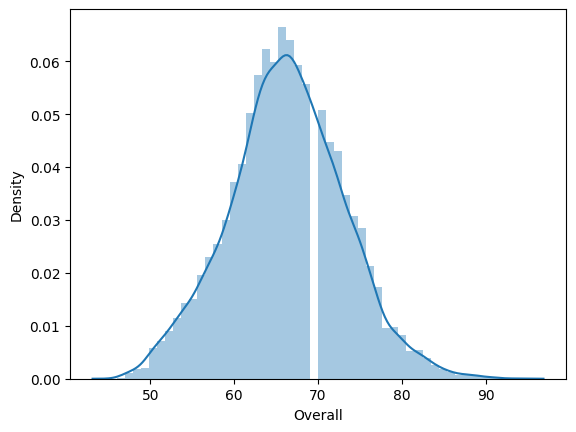

In [ ]:
sns.distplot(df['Overall'])
plt.show()

### Q10. Retrieve the names of top20 players based on the Overall rating.

In [ ]:
top20_players = df.groupby('Name')['Overall'].max().sort_values(ascending=False).head(20)
top20_players

Name
Cristiano Ronaldo    94
L. Messi             94
Neymar Jr            92
Sergio Ramos         91
E. Hazard            91
De Gea               91
L. Suárez            91
L. Modrić            91
K. De Bruyne         91
D. Godín             90
David Silva          90
T. Kroos             90
J. Oblak             90
R. Lewandowski       90
H. Kane              89
T. Courtois          89
S. Agüero            89
M. ter Stegen        89
Sergio Busquets      89
E. Cavani            89
Name: Overall, dtype: int64

### Q11. Generate a dataframe which should include all the information of the Top20 players based on the Overall rating.

In [ ]:
Top20_df = df[ (df['Name'].isin(top20_players.index)) & (df['Overall'].isin(top20_players.values)) ]
Top20_df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Q12. What is the average "Age" and "Wage" of these top20 players? (use the dataframe created in the question 11)

In [ ]:
Top20_df[['Age','Wage']].mean()

TypeError: Could not convert ['€565K€405K€290K€260K€355K€340K€420K€455K€380K€94K€205K€355K€125K€285K€205K€240K€240K€315K€200K€300K'] to numeric

### Q13. Among the top20 players based on the Overall rating, which player has the highest wage? Display the name of the player with his wage.

In [ ]:
Top20_df[Top20_df['Wage']==Top20_df['Wage'].max()][['Name','Wage']]

NameError: name 'Top20_df' is not defined

### Q14. Generate a dataframe which should include the "Player name", "Club Name", "Wage", and 'Overall rating'.
- i) find the average Overall rating for each club.
- ii) Display the average overall rating of Top10 Clubs using a plot

In [ ]:
## creating a dataframe
df_14 = df[['Name','Club','Wage','Overall']]
df_14.head(2)

In [ ]:
## Finding the average overall rating for each club
df_14.groupby('Club')['Overall'].mean()

NameError: name 'df_14' is not defined

In [ ]:
## Displaying the average overall rating of Top10 Clubs using a bar plot
df_14.groupby('Club')['Overall'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

NameError: name 'df_14' is not defined

### Q15. What is the relationship between age and individual potential of the player? Visualize the relationship with appropriate plot and Comment on the same.

In [ ]:
plt.figure(figsize=(18,5))
sns.boxplot(df['Age'],df['Potential'])
plt.show()

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1800x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(18,5))
sns.boxplot(df['Age'],df['Potential'])
plt.show()

In [ ]:
imp_features = df[['Potential','Overall','Value','International Reputation','Release Clause','Wage', ]]

sns.heatmap(imp_features.corr(),annot=True,cmap='viridis')
plt.show()

In [ ]:
sns.pairplot(imp_features)
plt.show()

### Q17. Find the position in the pitch where the maximum number of players play and the position where the minimum number of players play? Display it using a plot.

In [ ]:
df['Position'].value_counts().sort_values(ascending=False).head(1)

In [ ]:
df['Position'].value_counts().sort_values(ascending=True).head(1)

In [ ]:
plt.figure(figsize=(18,5))
sns.histplot(df['Position'])
plt.show()

### Q18. How many players are from the club 'Juventus' and the wage is greater than 200K? Display all the information of such players.

In [ ]:
df[(df['Club']=='Juventus') & (df['Wage']>200000)]

### Q19. Generate a dataframe containing  top 5 players by Overall rating for each unique positions.

In [ ]:
top5 = df.groupby(['Position']).apply(lambda x : x.sort_values('Overall',ascending=False).head(5))
top5.head(10)

### Q20. What is the average wage one can expect to pay for the top 5 in every position? (use the dataframe created in Q19)

In [ ]:
top5['Wage'].groupby('Position').mean()

NameError: name 'top5' is not defined